In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Задача 1. 

Поиграемся с датасетом про диабет (он совсем легкий). 

In [62]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

In [63]:
data.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [64]:
X = data.drop('Class variable (0 or 1)', axis=1)
y = data['Class variable (0 or 1)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y.value_counts()

Class variable (0 or 1)
0    500
1    268
Name: count, dtype: int64

Выборка несбалансирована.

In [65]:
# Соберем пайплайн с масштабированием и логистической регрессией
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear'))
])

pipe.fit(X_train, y_train)

ypred_train_pipe = pipe.predict(X_train)
ypred_test_pipe = pipe.predict(X_test)

print(classification_report(ypred_train_pipe, y_train), classification_report(ypred_test_pipe, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       448
           1       0.56      0.72      0.63       166

    accuracy                           0.77       614
   macro avg       0.72      0.75      0.73       614
weighted avg       0.80      0.77      0.78       614
               precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.67      0.65      0.66        57

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [66]:
# Создание и обучение пайплайна с SVM
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

pipe.fit(X_train, y_train)

ypred_train_pipe = pipe.predict(X_train)
ypred_test_pipe = pipe.predict(X_test)

print(classification_report(ypred_train_pipe, y_train), classification_report(ypred_test_pipe, y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       451
           1       0.55      0.72      0.63       163

    accuracy                           0.77       614
   macro avg       0.72      0.76      0.73       614
weighted avg       0.80      0.77      0.78       614
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.65      0.67      0.66        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



Обе модели показывают сопоставимую точность на обучающей и тестовой выборках, что указывает на их хорошую обобщающую способность, 
но более низкая точность для класса "1" отражает несбалансированность классов.

In [67]:
# Добавление параметра class_weight
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression(solver='liblinear', class_weight='balanced'))
    ])

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       366
           1       0.74      0.63      0.68       248

    accuracy                           0.76       614
   macro avg       0.76      0.74      0.74       614
weighted avg       0.76      0.76      0.76       614
               precision    recall  f1-score   support

           0       0.69      0.81      0.74        84
           1       0.71      0.56      0.62        70

    accuracy                           0.69       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.70      0.69      0.69       154



In [68]:
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', SVC(kernel='linear', class_weight='balanced'))
    ])

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       369
           1       0.75      0.65      0.70       245

    accuracy                           0.78       614
   macro avg       0.77      0.75      0.76       614
weighted avg       0.77      0.78      0.77       614
               precision    recall  f1-score   support

           0       0.69      0.81      0.74        84
           1       0.71      0.56      0.62        70

    accuracy                           0.69       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.70      0.69      0.69       154



Добавление class_weight='balanced' немного улучшило баланс между классами, но при этом снизило общую точность на тестовой выборке.

## Задача 2. 

Второй датасет - про покупателей велосипедов. 

In [271]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


Пытаемся по характеристикам человека понять, купит он велик или нет. 

In [272]:
data = data.drop('ID', axis=1)

In [273]:
data.isnull().sum()

Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [275]:
unique_values = {column: set(data[column]) for column in data.columns if data[column].dtype == 'object'}
unique_values

{'Marital Status': {'Married', 'Single'},
 'Gender': {'Female', 'Male'},
 'Education': {'Bachelors',
  'Graduate Degree',
  'High School',
  'Partial College',
  'Partial High School'},
 'Occupation': {'Clerical',
  'Management',
  'Manual',
  'Professional',
  'Skilled Manual'},
 'Home Owner': {'No', 'Yes'},
 'Commute Distance': {'0-1 Miles',
  '1-2 Miles',
  '10+ Miles',
  '2-5 Miles',
  '5-10 Miles'},
 'Region': {'Europe', 'North America', 'Pacific'},
 'Purchased Bike': {'No', 'Yes'}}

In [276]:
# Преобразование категориальных признаков в числа
data['Marital Status'] = data['Marital Status'].map({'Married': 1, 'Single': 0})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Home Owner'] = data['Home Owner'].map({'Yes': 1, 'No': 0})
data['Purchased Bike'] = data['Purchased Bike'].map({'Yes': 1, 'No': 0})

In [277]:
commute_distance_mapping = {
    '0-1 Miles': 0.5,
    '1-2 Miles': 1.5,
    '2-5 Miles': 3.5,
    '5-10 Miles': 7.5,
    '10+ Miles': 15
}

data['Commute Distance'] = data['Commute Distance'].map(commute_distance_mapping)

In [278]:
education_mapping = {
    'Partial High School': 0,
    'High School': 1,
    'Partial College': 2,
    'Bachelors': 3,
    'Graduate Degree': 4
}

data['Education'] = data['Education'].map(education_mapping)

In [279]:
data = pd.get_dummies(data, columns=['Region', 'Occupation'], drop_first=True) # One-Hot Encoding

<Axes: >

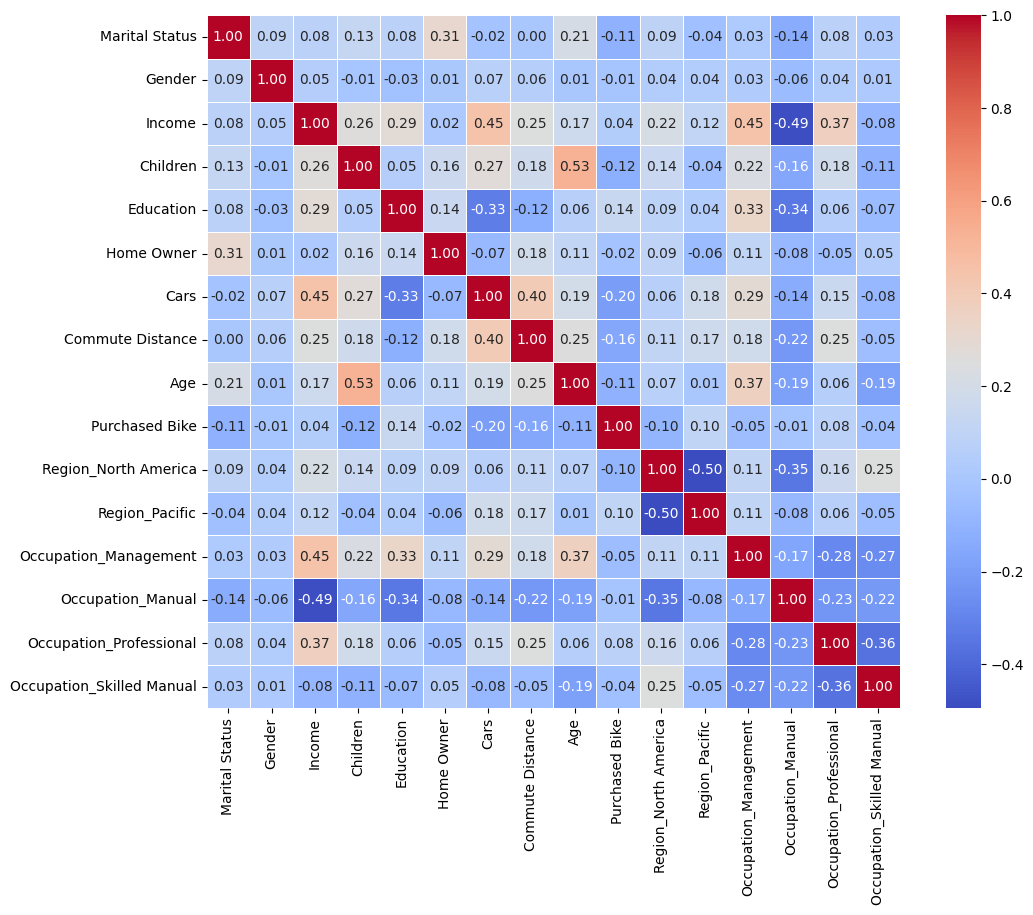

In [280]:
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',
            cmap='coolwarm', square=True)

У признака 'Gender' низкая корреляция с целевой переменной.  

In [281]:
data = data.drop(['Gender'], axis=1)
data.head()

,Marital Status,Income,Children,Education,Home Owner,Cars,Commute Distance,Age,Purchased Bike,Region_North America,Region_Pacific,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual
0,1,40000,1,3,1,0,0.5,42,0,False,False,False,False,False,True
1,1,30000,3,2,1,1,0.5,43,0,False,False,False,False,False,False
2,1,80000,5,2,0,2,3.5,60,0,False,False,False,False,True,False
3,0,70000,0,3,1,1,7.5,41,1,False,True,False,False,True,False
4,0,30000,0,3,0,0,0.5,36,1,False,False,False,False,False,False


In [282]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

y.value_counts()

Purchased Bike
0    519
1    481
Name: count, dtype: int64

In [283]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(solver='liblinear'))])

In [284]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       438
           1       0.60      0.65      0.63       362

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800
               precision    recall  f1-score   support

           0       0.65      0.66      0.65       106
           1       0.61      0.60      0.60        94

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



In [285]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [286]:
pipe.fit(X_train, y_train)
ypred_train_svc = pipe.predict(X_train)
ypred_test_svc = pipe.predict(X_test)

print(classification_report(ypred_train_svc, y_train), classification_report(ypred_test_svc, y_test))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       418
           1       0.63      0.64      0.64       382

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800
               precision    recall  f1-score   support

           0       0.61      0.65      0.63       102
           1       0.61      0.57      0.59        98

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200

